In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('donation_records.csv')

# 统计有记录以来厦大收到的捐赠总额
print(f"有记录以来厦大收到的捐赠总额为：{df['捐赠金额'].sum()}元")

有记录以来厦大收到的捐赠总额为：2065966651.81元


In [5]:
# 统计“奋进新百年、共筑新伟业”行动计划捐赠总额
selected_data = df[df['捐赠项目'].fillna('无').str.contains('奋进新百年、共筑新伟业')]['捐赠金额'].sum()
print(f"奋进新百年、共筑新伟业的捐赠金额总额为: {selected_data}元")

奋进新百年、共筑新伟业的捐赠金额总额为: 6851839.17元


In [8]:
# 统计守望相助 共克时艰——厦门大学支援武汉抗击新冠肺炎专项基金捐赠总额
selected_data = df[df['捐赠项目'].fillna('无').str.contains('守望相助  共克时艰——厦门大学支援武汉抗击新冠肺炎专项基金')]['捐赠金额'].sum()
print(f"统计守望相助 共克时艰——厦门大学支援武汉抗击新冠肺炎专项基金捐赠总额为: {selected_data}元")


统计守望相助 共克时艰——厦门大学支援武汉抗击新冠肺炎专项基金捐赠总额为: 3398618.5300000003元


In [9]:
# 降序列出捐赠最多的前100名
top_100_data = df.sort_values(by='捐赠金额', ascending=False).head(100)
print(f"奋进新百年、共筑新伟业的捐赠金额总额为:\n")
display(top_100_data)

奋进新百年、共筑新伟业的捐赠金额总额为:



,捐赠时间,捐赠人,院系专业,校友会,捐赠项目,捐赠金额
1115,2022-07-01,杭州市西湖区钟子逸教育基金会,NaN,社会爱心人士,教育发展基金,150000000.0
46360,2016-06-27,河仁慈善基金会,NaN,社会爱心人士,教育发展基金,100000000.0
46359,2016-06-27,河仁慈善基金会,NaN,社会爱心人士,教育发展基金,100000000.0
62553,2015-02-26,厦门骏豪地产开发有限公司,NaN,社会爱心人士,教育发展基金,30000000.0
63141,2013-04-01,厦门市开元国有资产投资有限公司,NaN,社会爱心人士,教育发展基金,30000000.0
...,...,...,...,...,...,...
2143,2022-02-08,梁凤仪,NaN,社会爱心人士,教育发展基金,4075500.0
63385,2012-01-20,曾宪梓,NaN,社会爱心人士,教育发展基金,4062000.0
45434,2016-10-25,上海安捷投资有限公司,NaN,社会爱心人士,医学院20周年院庆,4000000.0
45534,2016-10-11,王贺军,NaN,社会爱心人士,教育发展基金,4000000.0


In [10]:
# 统计每年的捐赠总额
df['捐赠时间'] = pd.to_datetime(df['捐赠时间'])
total_donations_by_year = df.groupby(df['捐赠时间'].dt.year)['捐赠金额'].sum()
print(f"每年的捐赠总额：\n ")
display(total_donations_by_year)

每年的捐赠总额：
 


捐赠时间
2007    2.421034e+07
2008    2.432732e+07
2009    3.686456e+07
2010    8.297341e+07
2011    5.270400e+07
2012    1.315729e+08
2013    9.696551e+07
2014    1.072333e+08
2015    1.593270e+08
2016    3.613518e+08
2017    5.197592e+07
2018    5.979929e+07
2019    5.850245e+07
2020    1.272658e+08
2021    3.015008e+08
2022    3.166046e+08
2023    7.278754e+07
Name: 捐赠金额, dtype: float64

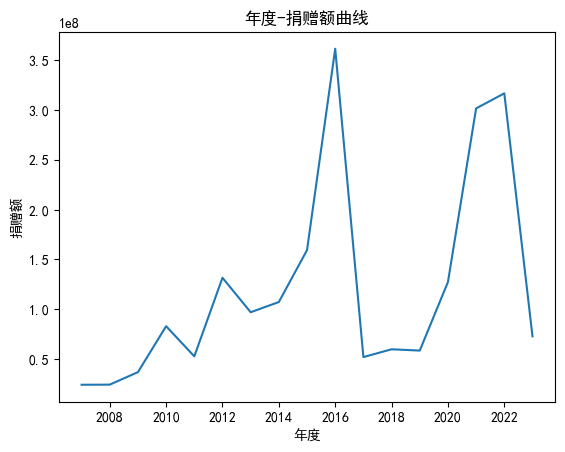

In [11]:
plt.rcParams['font.sans-serif'] = ['SimHei']
# 绘制“年度-捐赠额”曲线
plt.plot(total_donations_by_year.index, total_donations_by_year.values)

# 设置图表标题和坐标轴标签
plt.title('年度-捐赠额曲线')
plt.xlabel('年度')
plt.ylabel('捐赠额')

# 显示图表
plt.show()

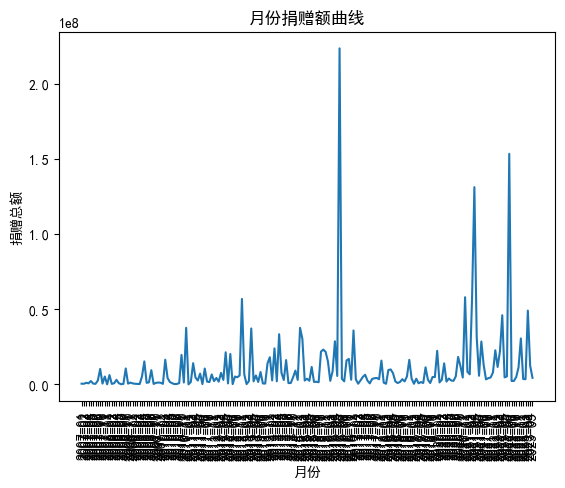

In [12]:
# 按月份进行分组并计算捐赠总额
total_donations_by_month = df.groupby(df['捐赠时间'].dt.strftime('%Y-%m'))['捐赠金额'].sum()

# 绘制“月份-捐赠额”曲线
plt.plot(total_donations_by_month.index, total_donations_by_month.values)

# 添加标题和坐标轴标签
plt.title('月份捐赠额曲线')
plt.xlabel('月份')
plt.ylabel('捐赠总额')
plt.xticks(rotation='vertical')

# 显示图形
plt.show()